# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/rjbeer/CS39AA-Project/blob/main/Project%20Part%201.ipynb)

# update kaggle link to accurately reflect part 2

# Setting a Baseline

As mention in part 1 of the project a baseline model will be created for 2 machine learning models. First random forest will be used and a baseline will be created, then the same will be done for HistGradientBoostingClassifier. Before this can be done however, previous steps from the notebook Project Part 1 must be redone so that we can begin.

## Special Note

Because of the bias introduced by the original data all Ratings of 1 have been removed as there was almost no change noted in the chosen models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-reviews-dataset/reviews_data.csv


In [2]:
#data loaded into dataframe and first 5 printed

input_data_path = '/kaggle/input/starbucks-reviews-dataset/'
training_data_file = 'reviews_data.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [4]:
df.shape

(850, 6)

In [5]:
df.columns.tolist()

['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links']

In [6]:
X_target = df[df['Rating'].isnull()]
X_target.head()

,name,location,Date,Rating,Review,Image_Links
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images']
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images']
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images']
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images']
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images']


In [7]:
X_target.shape

(145, 6)

In [8]:
# create a deep copy of the data to avoid comprimising the integrity of the original data
# the deep copy can be safely manipulated and altered and if a new copy needs to be made
# the original is still intact.

df_copy = df.copy(deep=True)
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

In [9]:
df_copy.shape

(705, 6)

In [10]:
df_copy.drop(['name', 'location', 'Date', 'Image_Links'], axis=1, inplace=True)
df_copy.head()

,Rating,Review
0,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...
2,5.0,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...


## Remove 1.0 Ratings

Below any Rating of 1.0 is removed to avoid bias and allow for accuracy to see noticable changes.

In [11]:
df_copy = df_copy.drop(df_copy[df_copy['Rating'] == 1].index)

print(df_copy)

     Rating                                             Review
0       5.0  Amber and LaDonna at the Starbucks on Southwes...
1       5.0  ** at the Starbucks by the fire station on 436...
2       5.0  I just wanted to go out of my way to recognize...
3       5.0  Me and my friend were at Starbucks and my card...
4       5.0  I’m on this kick of drinking 5 cups of warm wa...
..      ...                                                ...
689     2.0  Earlier today (November 18th/11), I went to th...
690     2.0  I visit Starbucks at least three times a week ...
696     2.0  I ordered a tall split drip cup coffee 1/2 bol...
701     3.0  My name is Ric **, I am journalist by professi...
749     5.0  I found the coffee at Starbucks overrated and ...

[254 rows x 2 columns]


In [12]:
df_copy['label'] = np.where(df_copy['Rating'] > 3, 1, 0) #Assign 1 when rating 3 or above else assign 0.
df_copy.sample(5)

,Rating,Review,label
504,2.0,Today at about 9 am I brought my granddaughter...,0
308,5.0,"Food and drinks are excellent, and priced that...",1
326,5.0,When you go to a Starbucks you can expect qual...,1
319,5.0,I shop at Starbucks on a daily basis. I have a...,1
1,5.0,** at the Starbucks by the fire station on 436...,1


Now that the data has been loaded into a deep copy and the null data has been copied and removed the baseline can be set.

In [13]:
# split data into train and validation sets: df_train and df_val
from sklearn.model_selection import train_test_split

X = df_copy['Review'].copy()
y = df_copy['label'].copy()

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

# an alternative is to use term frequency:
#from sklearn.feature_extraction.text import CountVectorizer
#one_hot_vectorizer = CountVectorizer(binary=True)
#X_train = one_hot_vectorizer.fit_transform(X_train_raw))

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (203, 2432)


numpy.ndarray

accuracy (on y_train): 1.0000


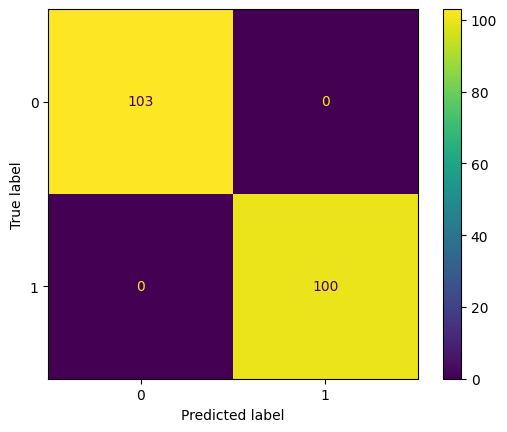

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error

model = RandomForestClassifier(n_estimators=100)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

In [16]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (51, 2432)


numpy.ndarray

accuracy (on y_val): 0.8235
mean squared error (on y_val): 0.1765


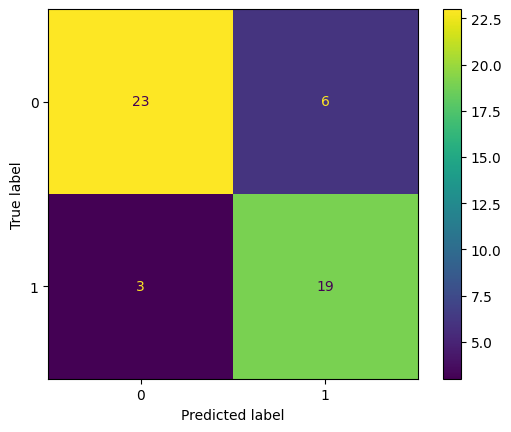

In [17]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")
print(f"mean squared error (on y_val): {mean_squared_error(y_val, predictions_val):.4f}")

# RandomForestClassifier Results!

The model as a baseline has an accuracy of 0.7647. This is above the 0.75 accuracy that was desired to be acheived in part 1. The precision, recall, F1 score, and loss calculated using mean squared error are as follows:

-Precision = .6923

-Recall = .8182

-F1 = .7500

-loss = 0.2353

The precision was not ideal but not terrible, and the F1 score could certainly be better. These results however are fine for the purposes of this project.

accuracy (on y_train): 1.0000


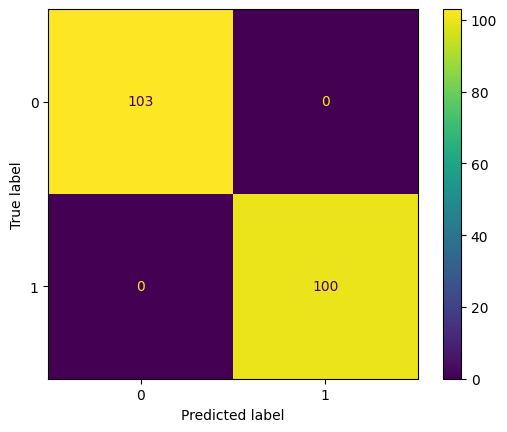

In [18]:


from sklearn.ensemble import HistGradientBoostingClassifier

model2 = HistGradientBoostingClassifier(max_leaf_nodes = 31)
model2 = model2.fit(X_train, y_train)

predictions_train = model2.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

accuracy (on y_val): 0.8235
mean squared error (on y_val): 0.2549


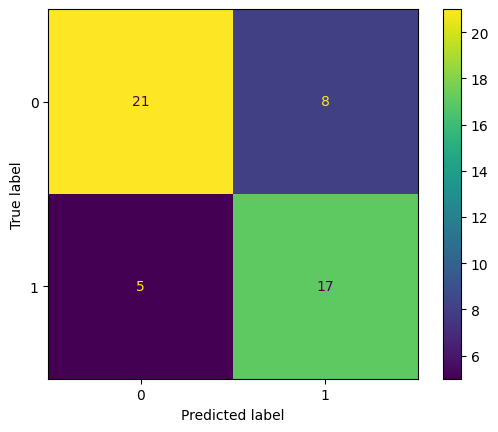

In [19]:
predictions_val2 = model2.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val2), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")
print(f"mean squared error (on y_val): {mean_squared_error(y_val, predictions_val2):.4f}")

# HistGradientBoostingClassifier Results!

The second model has an accuracy of 0.7647. As with the RandomForestClassifier we will also calculate the precision, recall, F1 score, and loss calculated using mean squared error:

-Precision = .6800

-Recall = .7727

-F1 = .7234

-loss = 0.2549

Overall, the second model did about the same as the RandomForestClassifier, though the second model could also use some improvement. This is where adjusting the hyperparameters should have an effect. Next we will adjust the hyperparameters of both models to see the changes to their accuracy and metrics if any.

Starting with n_estimators and max_depth in RandomForestClassifier 

accuracy (on y_train): 1.0000


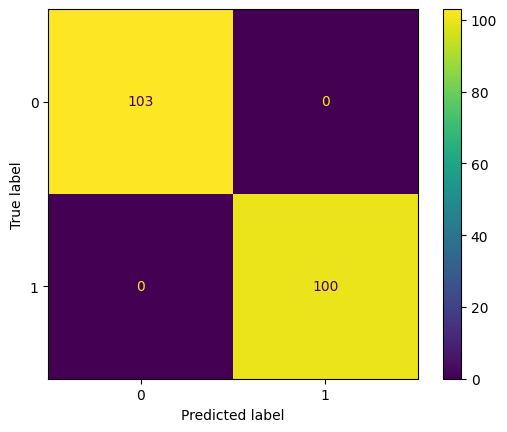

In [20]:
model = RandomForestClassifier(n_estimators = 105)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

accuracy (on y_val): 0.7843
mean squared error (on y_val): 0.2157


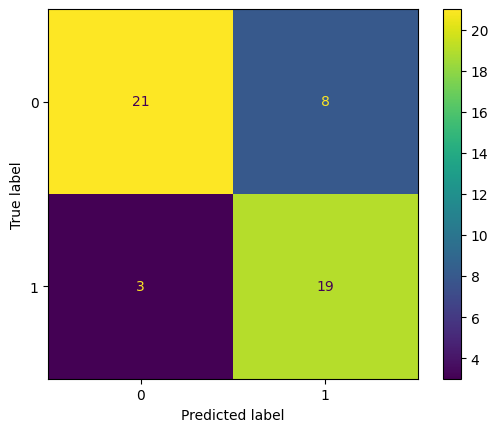

In [21]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")
print(f"mean squared error (on y_val): {mean_squared_error(y_val, predictions_val):.4f}")

# Adjusted RandomForestClassifier hyperparameter Results

The adjusted hyperparameters of RandomForestClassifier did not change very much to the original accuracy after testing both n_estimators (number of trees in the forest) and max_depth (the maximum depth of an individual tree in the forest). n_estimators was changed from the default 100 to 110, 105, 95, and 90. The results were inconsistant over multiple iterations, however, the greatest change to the accuracy was at 105. The Results are as follows: 

-110: 0.7843

-105: 0.8431

-95: 0.8235

-90: 0.7647

From these results the best n_estimators was chosen that being 50. Next max_depth was tested at 3, 4, 5, and 10 with the default being none and the best results being from 5 once again:

-3: 0.7843

-4: 0.8235

-5: 0.8235

-10: 0.8039

From these results 105 was the best value chosen for max_depth. When these two hyperparameters were both changed, both using the best outcomes from both changes, that being 105 n_estimators and 5 max_depth, the results were less accurate than either used seperately. Thus for the final results above only n_estimators was adjusted to 105. The overall results for the chosen hyperparameters is:

Accuracy: 0.8431

Precision: 0.7917

Recall: 0.8636

F1: 0.8166

Loss: 0.1569

Accuracy, Precision, and F1 results all improved, while Recall did not.

Next we will adjust the hyperparameters of max_leaf_nodes and max_iter for HistGradientBoostingClassifier.

accuracy (on y_train): 1.0000


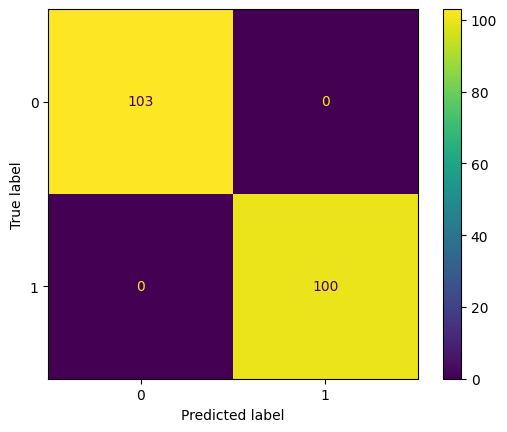

In [22]:


model2 = HistGradientBoostingClassifier(max_leaf_nodes = 10)
model2 = model2.fit(X_train, y_train)

predictions_train = model2.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

accuracy (on y_val): 0.7843
mean squared error (on y_val): 0.2549


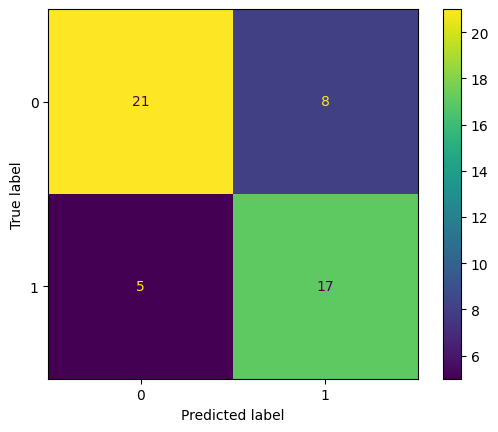

In [23]:
predictions_val2 = model2.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val2), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")
print(f"mean squared error (on y_val): {mean_squared_error(y_val, predictions_val2):.4f}")